In [1]:
import warnings
warnings.filterwarnings('ignore')

In [2]:
from hidrocomp.eflow.iha import IHA
import pandas as pd
import plotly as py
from hidrocomp.series.flow import Flow
from simulation import Simulation

In [3]:
file = "../Medicoes/PIMENTAL.csv"
data = pd.read_csv(file, ',', index_col=0, parse_dates=True)
flow = Flow(data=data, source='ONS', station="PIMENTAL")
flow.station = "Natural"
flow.data = flow.data.rename(columns={"PIMENTAL": "Natural"})
month = flow.month_start_year_hydrologic()
date_start = flow.date_start.replace(day=1, month=month[2]) #date_start=01/03/1970
date_end = flow.date_end.replace(day=31, month=month[0]-1) #date_end=31/08/2018
flow.date(date_start=date_start, date_end=date_end) #data range definition

threshold_high=11749.49
threshold_low=1397.0
mxt_flow = 13950 # Maximum turbochargeable flow
simulation = Simulation(data=flow, mxt_flow=mxt_flow)

In [4]:
scenery_eflows_ana_A = simulation.rule_02(hydro_start="A")

In [5]:
#Remover ano de 2016
date_start_del = pd.to_datetime("01/09/2015", dayfirst=True)
date_end_del = pd.to_datetime("31/08/2016", dayfirst=True)
data_del = pd.date_range(date_start_del, date_end_del, freq='D').values
month_water = flow.month_start_year_hydrologic()[0]
scenery_eflows_ana_A_del = scenery_eflows_ana_A[0].drop(data_del)
data_tvr_scenery_eflows_ana_A = Flow(pd.DataFrame(scenery_eflows_ana_A_del.TVR))
data_natural = Flow(pd.DataFrame(scenery_eflows_ana_A_del.Natural))
scenery_eflows_ana_A_del

TVR  Derivation channel   Natural  e-flow
1970-03-01  2500.0             8648.00  11148.00  2500.0
1970-03-02  2500.0             9209.00  11709.00  2500.0
1970-03-03  2500.0             9974.00  12474.00  2500.0
1970-03-04  2500.0            10852.00  13352.00  2500.0
1970-03-05  2500.0            11632.00  14132.00  2500.0
...            ...                 ...       ...     ...
2018-08-27   900.0              214.00   1114.00   900.0
2018-08-28   900.0              226.26   1126.26   900.0
2018-08-29   900.0              262.30   1162.30   900.0
2018-08-30   900.0              319.23   1219.23   900.0
2018-08-31   900.0              226.99   1126.99   900.0

[17350 rows x 4 columns]

# Scenery 02: ANA Start A

In [6]:
iha_sim_scenery_eflows_ana_A = IHA(data_tvr_scenery_eflows_ana_A, month_water=month_water, status='pos', statistic='non-parametric', central_metric='mean',
                                   variation_metric='cv',  type_criterion=None, type_threshold="stationary", duration=0,
                                   threshold_high=threshold_high, threshold_low=threshold_low, source="ONS", station='TVR - ANA Start A')

## Magnitude

In [7]:
iha_mag_scenery_eflows_ana_A = iha_sim_scenery_eflows_ana_A.magnitude
iha_mag_scenery_eflows_ana_A.metrics

Coeff. of Var.        Means
January          0.423061  1261.415237
February         0.660143  2641.545501
March            0.528957  6188.789973
April            0.285055  7608.333042
May              0.546843  4129.154355
June             0.275256  1662.666667
July             0.091871  1100.000000
August           0.006191   899.099617
September        0.025102   743.465199
October          0.042323   691.075237
November         0.004943   799.258028
December         0.031024   904.091283

## Frequency and Duration

In [8]:
iha_freq_dur_scenery_eflows_ana_A = iha_sim_scenery_eflows_ana_A.frequency_and_duration
iha_freq_dur_scenery_eflows_ana_A.metrics

Coeff. of Var.       Means
High pulse count           1.977336    0.270833
High pulse duration        0.719504   18.409091
Low pulse count            0.301167    1.062500
Low pulse duration         0.172974  217.308511

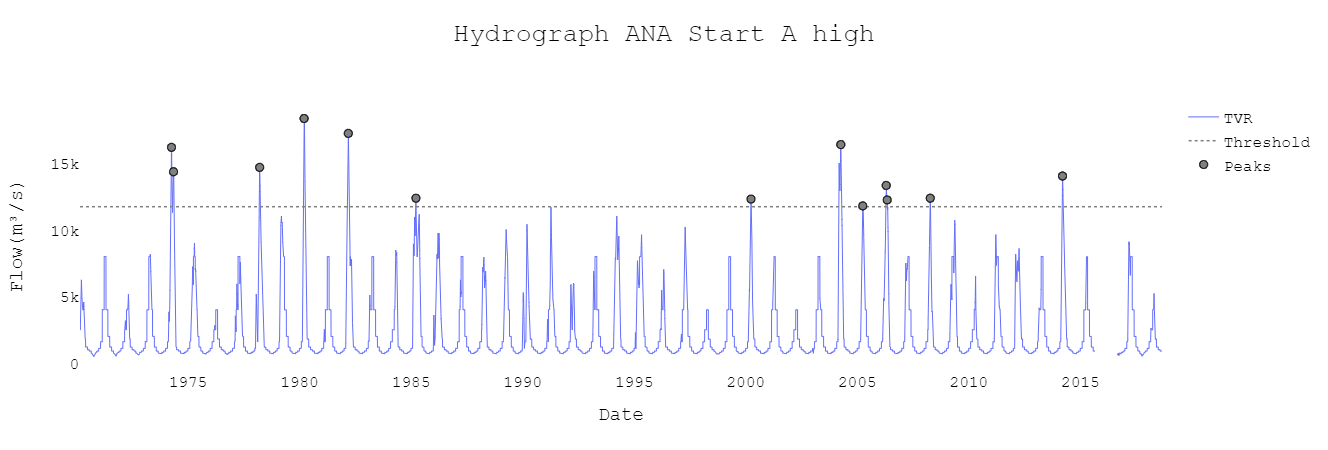

In [9]:
fig_partial_high_scenery_eflows_ana_A, data_fig_partial_high_scenery_eflows_ana_A = iha_freq_dur_scenery_eflows_ana_A.events_high.hydrogram(title="Hydrograph ANA Start A high", color={"Natural": "#002e6f"})

del data_fig_partial_high_scenery_eflows_ana_A[2]
del data_fig_partial_high_scenery_eflows_ana_A[2]

py.offline.iplot(fig_partial_high_scenery_eflows_ana_A)

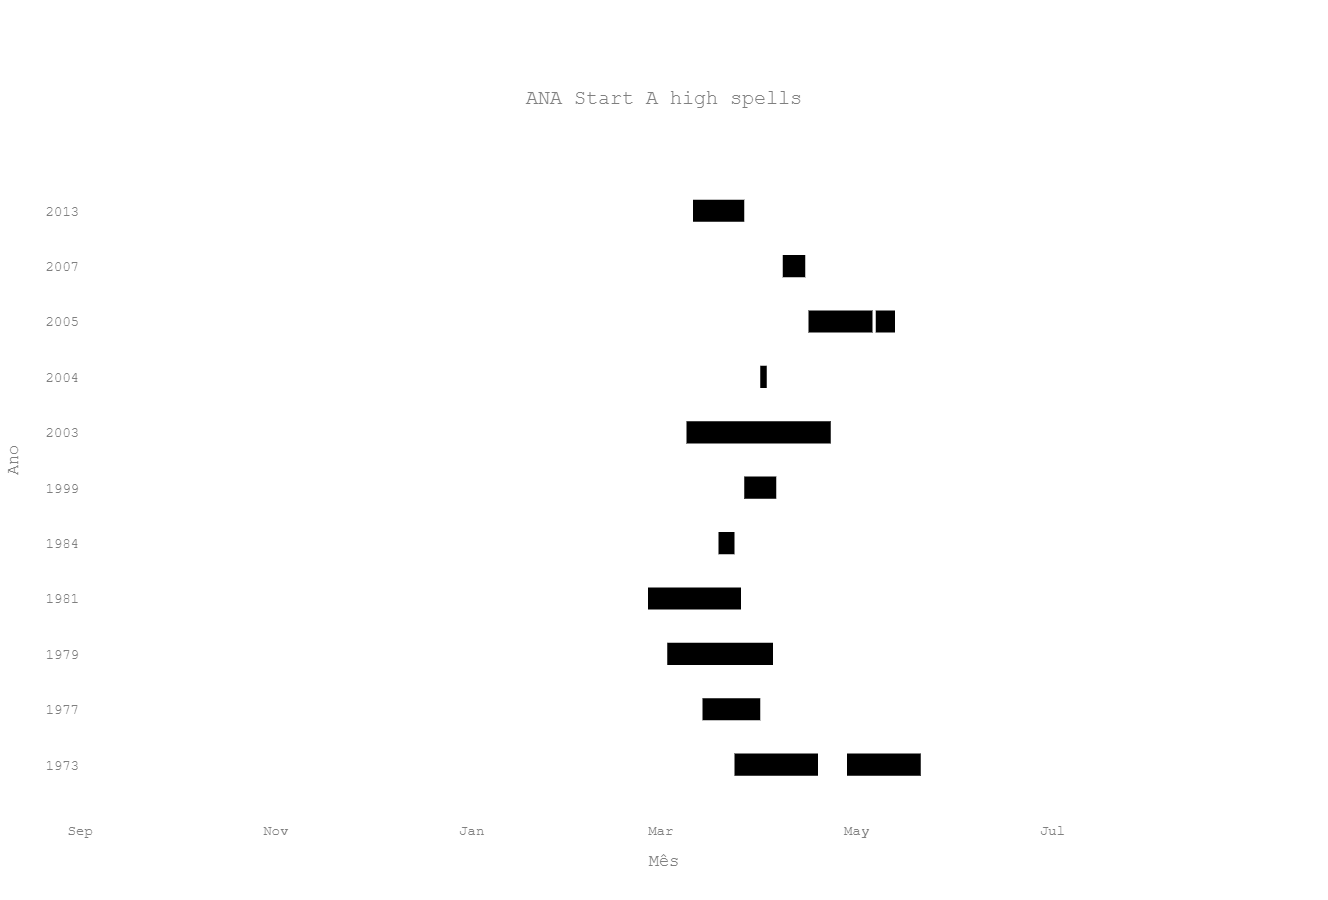

In [10]:
fig_spells_scenery_eflows_ana_A, fig_data_spells_scenery_eflows_ana_A = iha_freq_dur_scenery_eflows_ana_A.events_high.plot_spells(title="ANA Start A high spells")
py.offline.iplot(fig_spells_scenery_eflows_ana_A)

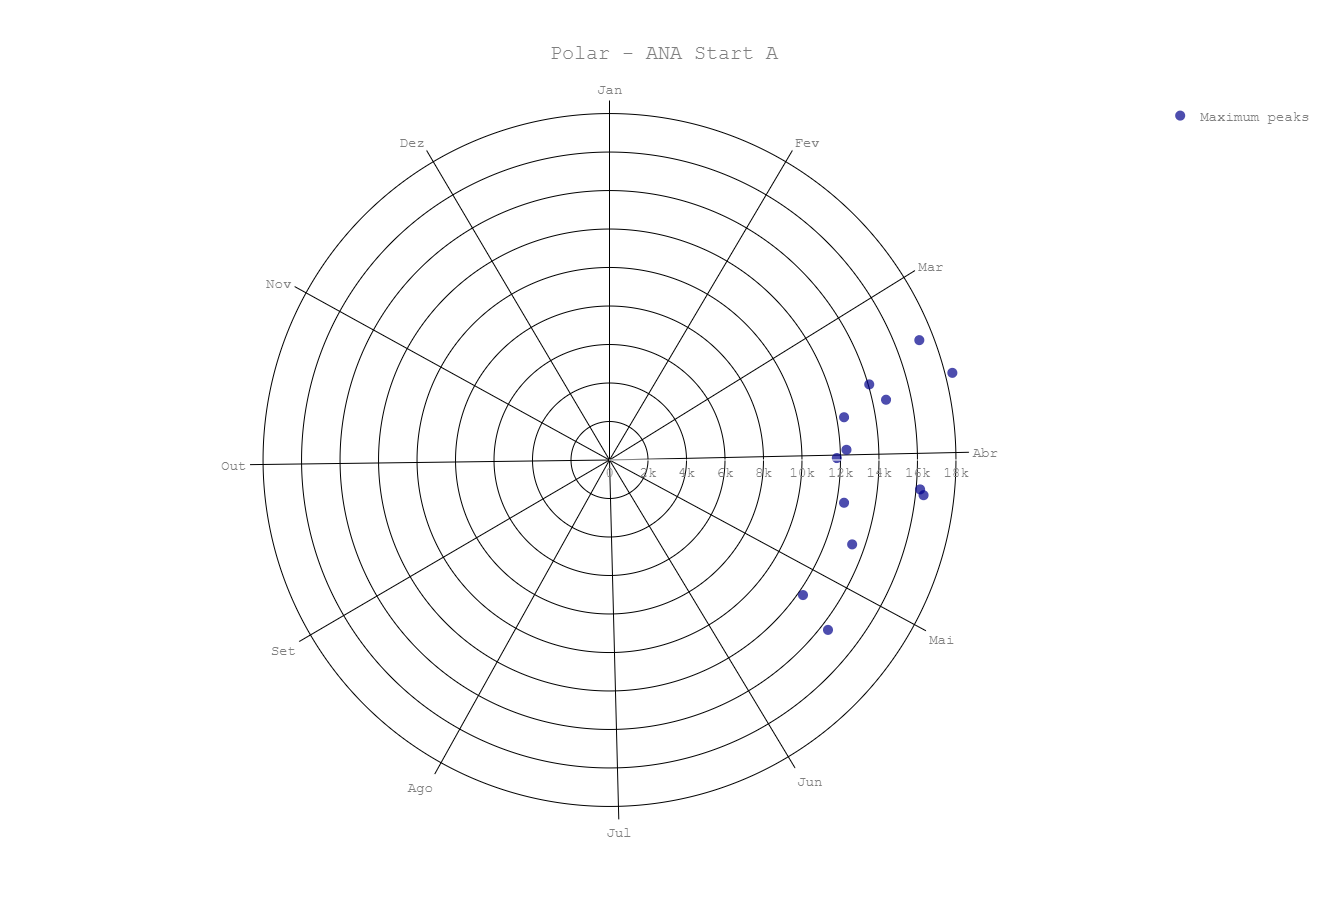

In [11]:
fig_polar_scenery_eflows_ana_A_high, fig_polar_data_scenery_eflows_ana_A_high = iha_freq_dur_scenery_eflows_ana_A.events_high.polar(title="Polar - ANA Start A", color="#00008B")

py.offline.iplot(fig_polar_scenery_eflows_ana_A_high)

## Magnitude e Duration

In [12]:
iha_mag_dur_scenery_eflows_ana_A  = iha_sim_scenery_eflows_ana_A.magnitude_and_duration
iha_mag_dur_scenery_eflows_ana_A.metrics

Coeff. of Var.        Means
1-day minimum              0.089327   684.095000
1-day maximum              0.353281  9561.752917
3-day minimum              0.086304   685.224236
3-day maximum              0.353546  9521.954514
7-day minimum              0.080313   687.131548
7-day maximum              0.352246  9424.699583
30-day minimum             0.062804   693.627049
30-day maximum             0.330315  8659.141958
90-day minimum             0.058499   749.291289
90-day maximum             0.337081  6199.884454
Number of zero days             NaN     0.000000
Base flow index            0.245190     0.302552

## Timing Extreme

In [13]:
iha_timing_scenery_eflows_ana_A = iha_sim_scenery_eflows_ana_A.timing_extreme
iha_timing_scenery_eflows_ana_A.metrics

Coeff. of Var.       Means
Date of minimum        0.035968  274.229167
Date of maximum        0.159917   94.250000

## Rate and Frequency

In [14]:
iha_rate_freq_scenery_eflows_ana_A = iha_sim_scenery_eflows_ana_A.rate_and_frequency
iha_rate_freq_scenery_eflows_ana_A.metrics

Coeff. of Var.       Means
Rise rate                  0.463503  399.856435
Fall rate                 -0.689532 -430.309988
Number of reversals        0.382802   19.469388

## Polar Natural x ANA Start A

In [15]:
iha_natural = IHA(data_natural, month_water=month_water, status='pre', statistic='non-parametric', central_metric='mean', 
                                      variation_metric='cv',  type_criterion=None, type_threshold="stationary", duration=0,
                                      threshold_high=threshold_high, threshold_low=threshold_low, source="ONS", station='Natural')

In [16]:
freq_dur_natural = iha_natural.frequency_and_duration
fig_polar_natural_high, data_polar_natural_high = freq_dur_natural.events_high.polar(title="Natural", color="#00008B")

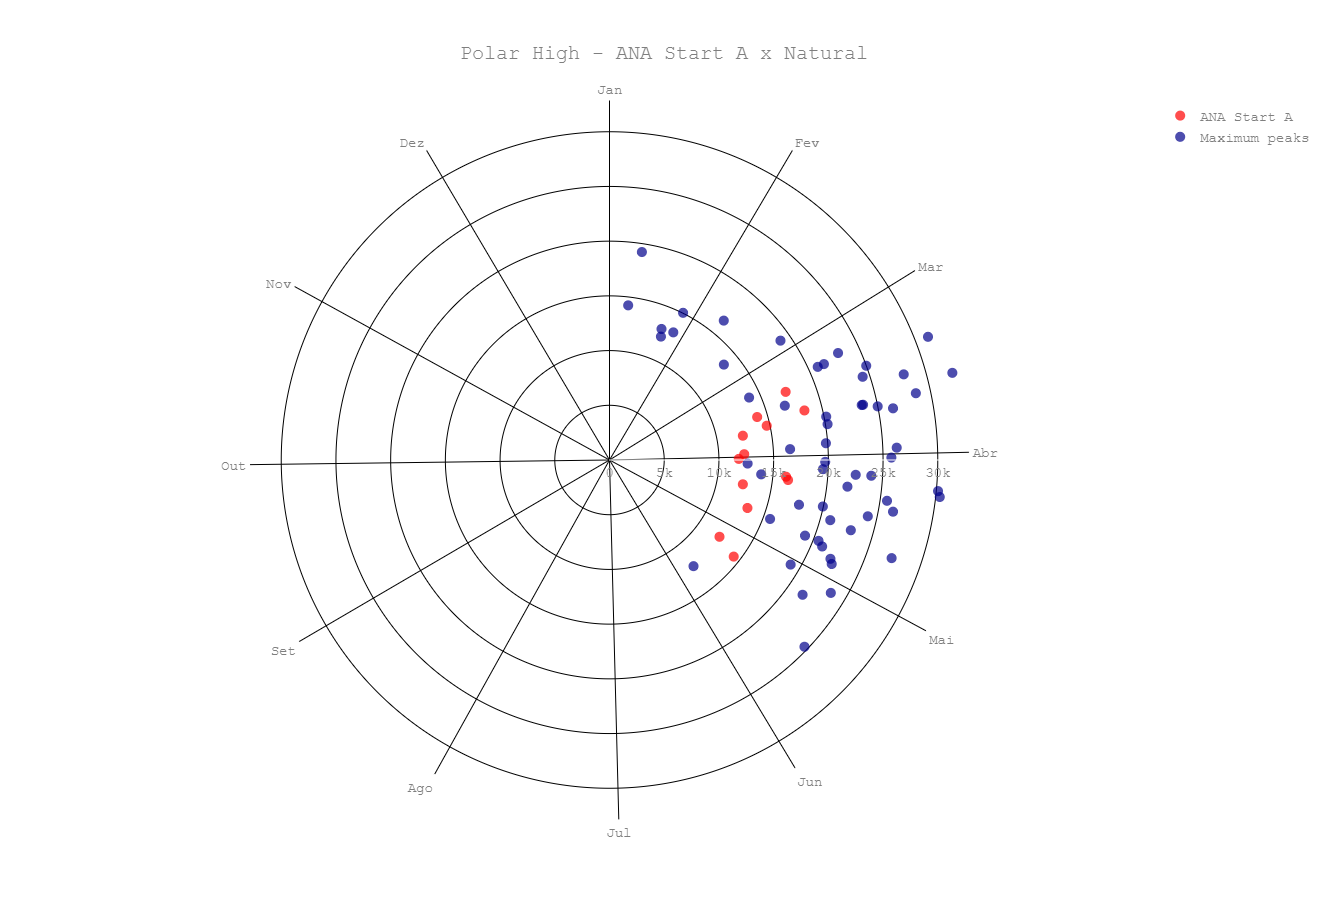

In [17]:
layout=fig_polar_scenery_eflows_ana_A_high['layout']

layout['title']['text'] = "Polar High - ANA Start A x Natural"
fig_polar_data_scenery_eflows_ana_A_high[0]['marker']['color'] = "red"
fig_polar_data_scenery_eflows_ana_A_high[0]['name'] = "ANA Start A"
fig_polar_natural_scenery_eflows_ana_A = dict(data=fig_polar_data_scenery_eflows_ana_A_high+[data_polar_natural_high[0]], layout=layout)

py.offline.iplot(fig_polar_natural_scenery_eflows_ana_A)

# DHRAM - Dundee Hydrologic Regime Assessment Method

In [18]:
dhram = iha_natural.dhram(iha_obs=iha_sim_scenery_eflows_ana_A, m=500, interval=95)
dhram.classification

'21.0 Points - Severely impacted'

In [19]:
dhram.point

Mean Std
Frequency and Duration    3   1
Magnitude                 3   3
Magnitude and Duration    3   2
Rate and Frequency        3   3
Timing Extreme            0   0

## Magnitude

In [20]:
dhram_magnitude = dhram.aspects["Magnitude"]
dhram_magnitude.abnormality

Abnormality_mean Abnormality_std
January           -6.22728        -2.83793
February          -9.08886        -2.58647
March             -9.15229        -1.54166
April             -11.7702        -1.20927
May               -7.65759        -2.22493
June              -6.43795        -2.29679
July              -7.00091        -4.29522
August            -6.77676        -5.73955
September         -4.92911        -4.75354
October           -4.67729        -2.95051
November          -4.74597        -3.39772
December          -6.45933        -2.21752

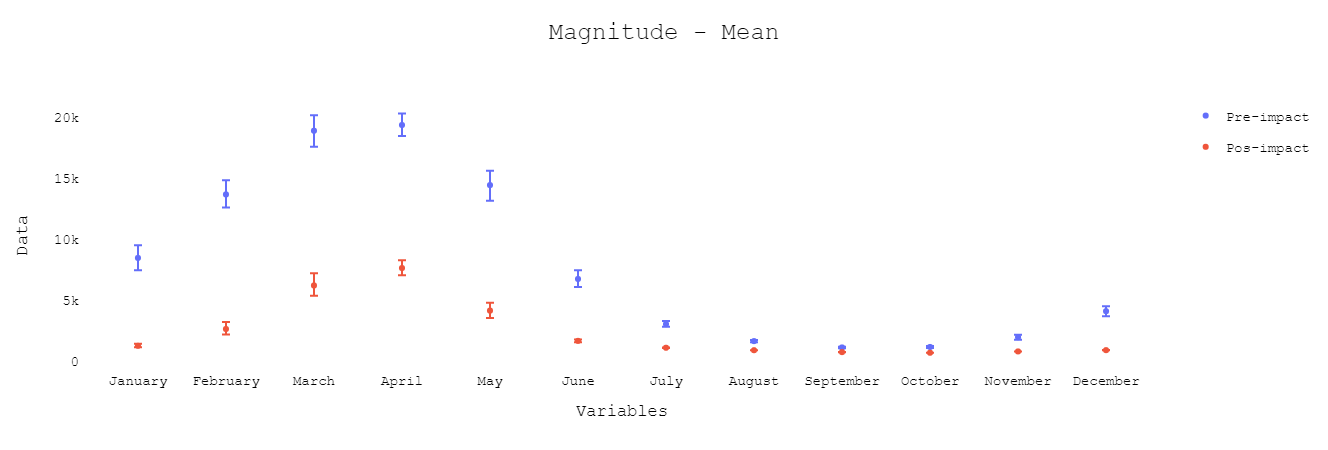

In [21]:
fig_M, data_M = dhram.aspects["Magnitude"].plot(type="mean")
py.offline.iplot(fig_M)

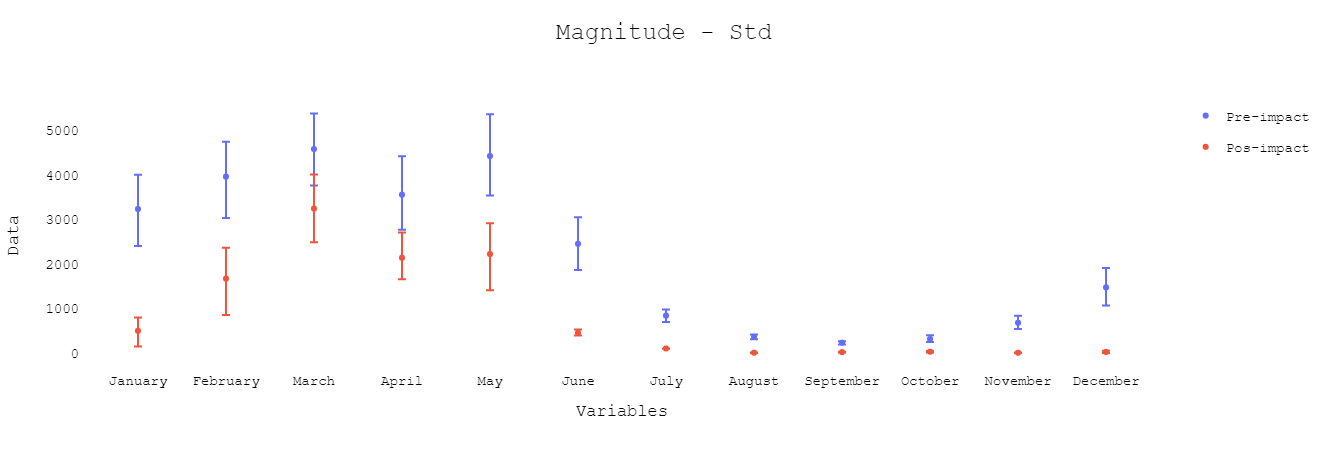

In [22]:
fig_M, data_M = dhram.aspects["Magnitude"].plot(type="std")
py.offline.iplot(fig_M)

## Magnitude and Duration

In [23]:
dhram_magnitude_duration = dhram.aspects["Magnitude and Duration"]
dhram_magnitude_duration.abnormality

Abnormality_mean Abnormality_std
1-day minimum               -3.57706        -3.88006
1-day maximum               -10.3428        -0.92989
3-day minimum               -3.41487        -4.29788
3-day maximum                -9.9811       -0.942896
7-day minimum               -3.71021        -4.26892
7-day maximum               -10.3475        -1.01484
30-day minimum              -4.64123        -5.19626
30-day maximum              -10.3199        -1.28987
90-day minimum              -4.54575        -1.92922
90-day maximum              -11.3739        -1.63685
Number of zero days              NaN             NaN
Base flow index               17.131         3.70411

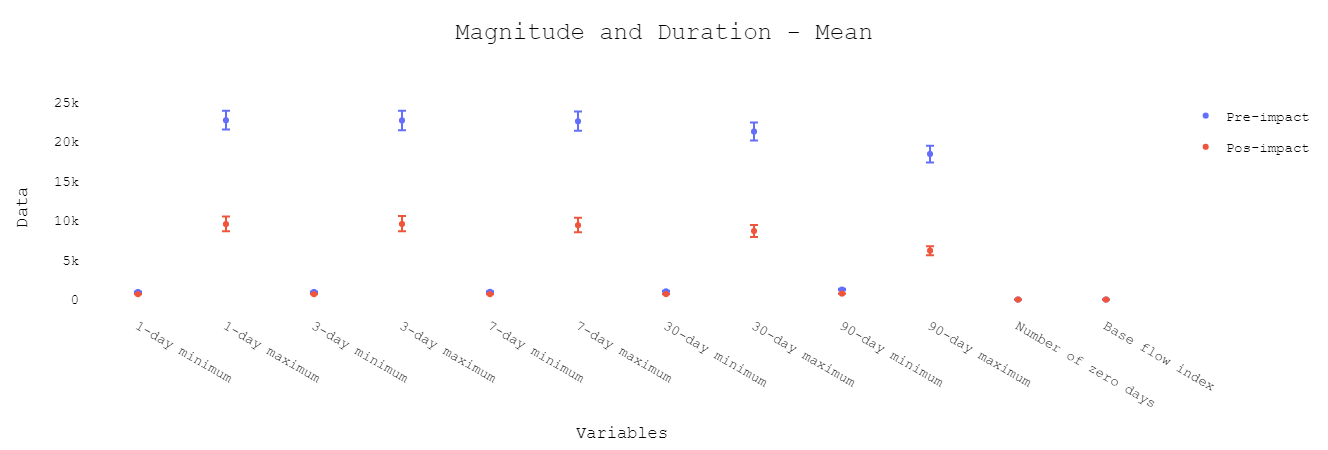

In [24]:
fig_mean_MD, data_mean_MD = dhram.aspects["Magnitude and Duration"].plot(type="mean")
py.offline.iplot(fig_mean_MD)

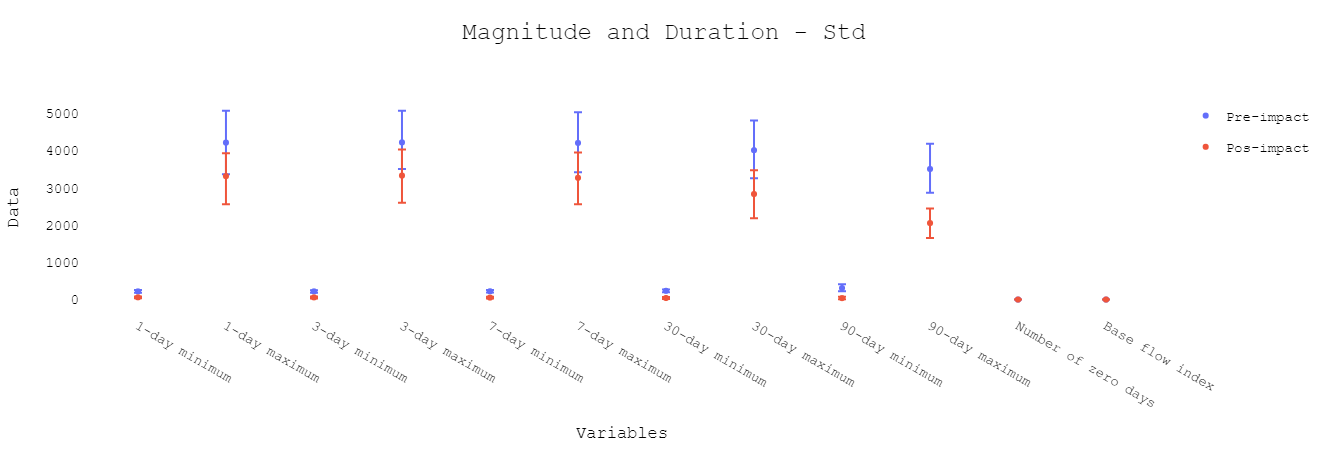

In [25]:
fig_std_MD, data_std_MD = dhram.aspects["Magnitude and Duration"].plot(type="std")
py.offline.iplot(fig_std_MD)

## Timing Extreme

In [26]:
dhram_timing = dhram.aspects["Timing Extreme"]
dhram_timing.abnormality

Abnormality_mean Abnormality_std
Date of minimum        -0.198738       0.0766655
Date of maximum         0.523386       -0.730749

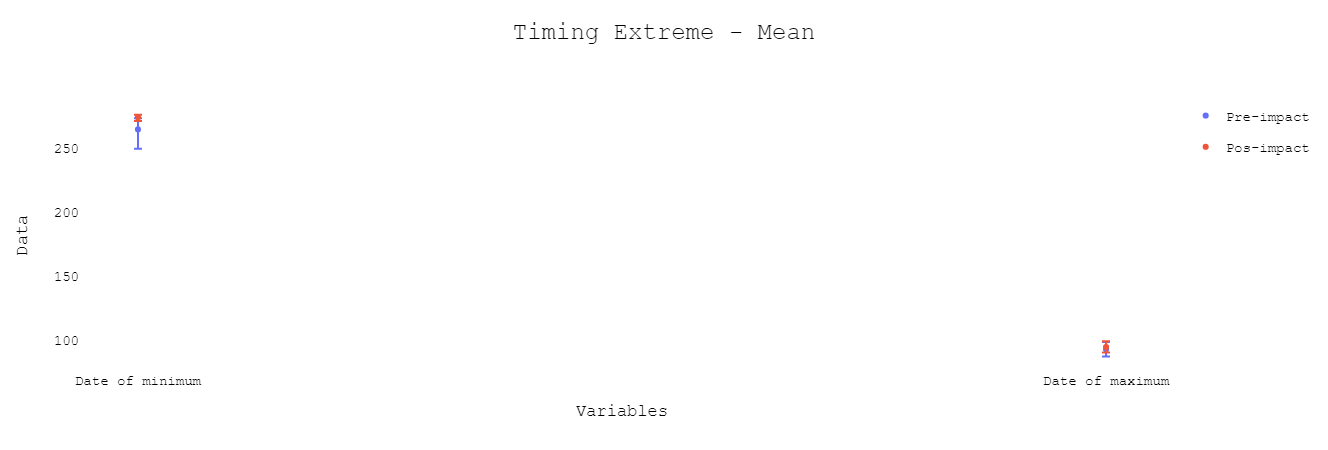

In [27]:
fig_mean_TE, data_mean_TE = dhram.aspects["Timing Extreme"].plot(type="mean")
py.offline.iplot(fig_mean_TE)

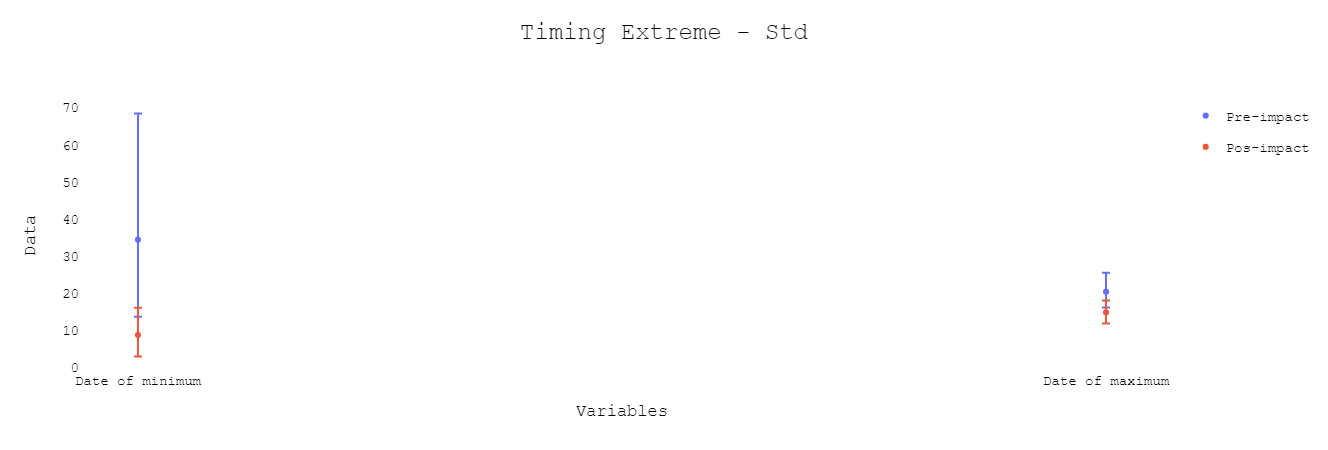

In [28]:
fig_std_TE, data_std_TE = dhram.aspects["Timing Extreme"].plot(type="std")
py.offline.iplot(fig_std_TE)

## Frequency and Duration

In [29]:
dhram_frequency_duration = dhram.aspects["Frequency and Duration"]
dhram_frequency_duration.abnormality

Abnormality_mean Abnormality_std
High pulse count            -6.64046        0.190624
High pulse duration          -7.9015        -3.10201
Low pulse count            -0.733103        -2.26916
Low pulse duration           14.5561       -0.742195

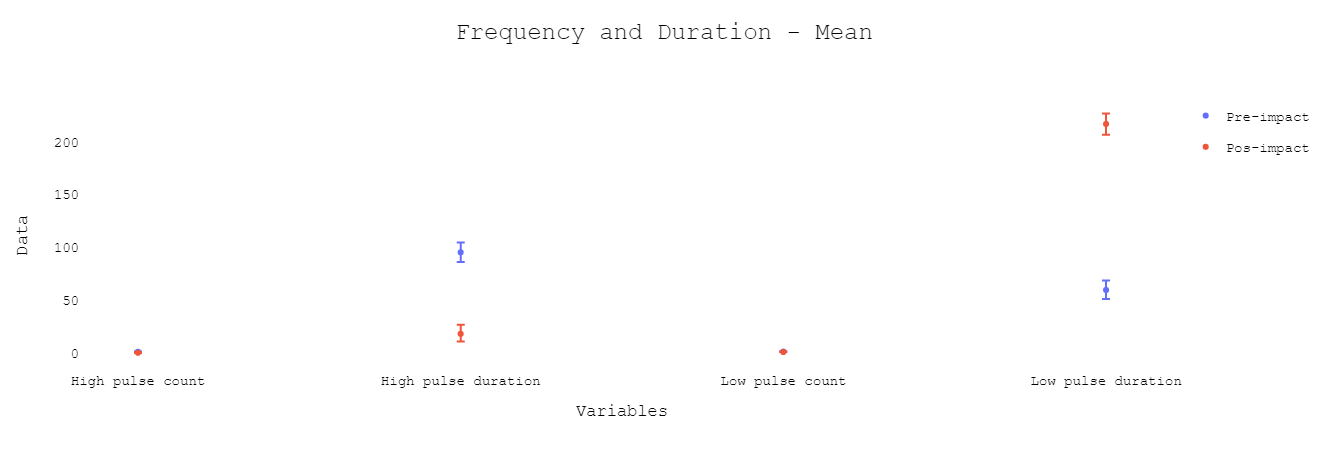

In [30]:
fig_mean_FD, data_mean_FD = dhram.aspects["Frequency and Duration"].plot(type="mean")
py.offline.iplot(fig_mean_FD)

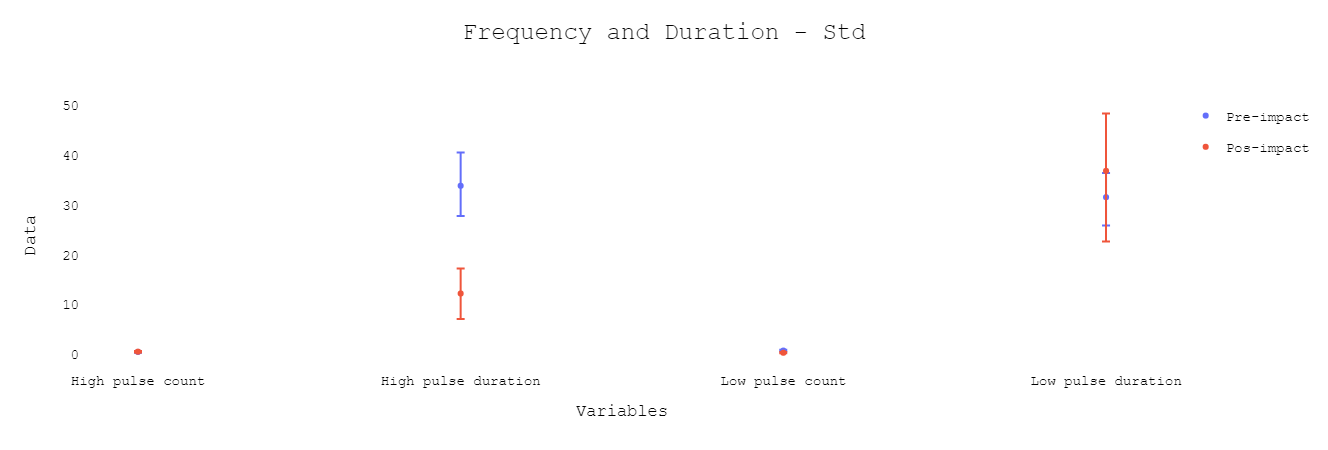

In [31]:
fig_std_FD, data_std_FD = dhram.aspects["Frequency and Duration"].plot(type="std")
py.offline.iplot(fig_std_FD)

## Rate and Frequency

In [32]:
dhram_rate_frequency = dhram.aspects["Rate and Frequency"]
dhram_rate_frequency.abnormality

Abnormality_mean Abnormality_std
Rise rate                    8.15758        0.994644
Fall rate                   -47.1064         27.7355
Number of reversals         -5.61275       -0.906191

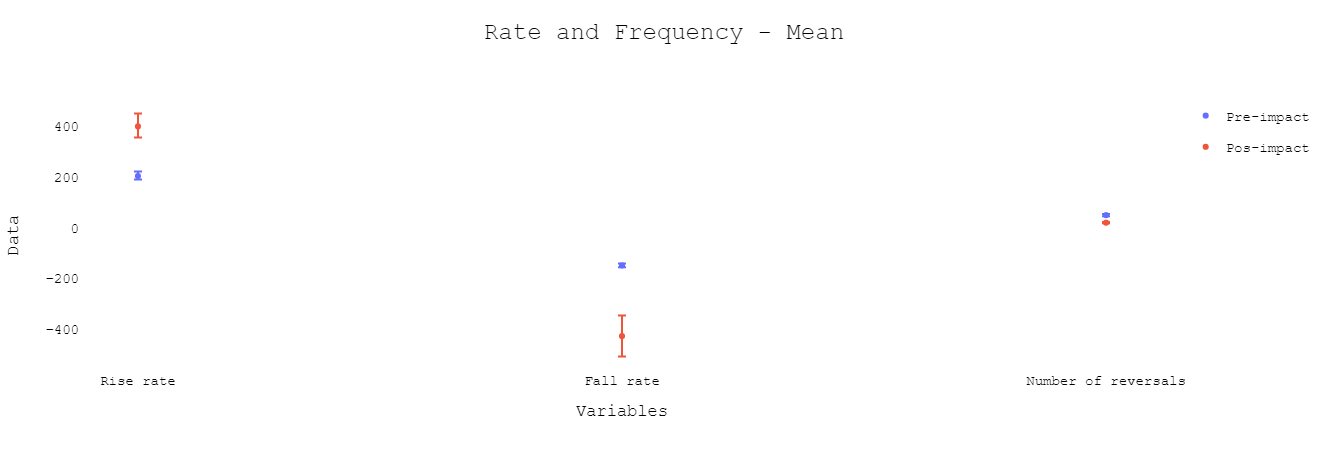

In [33]:
fig_mean_RF, data_mean_RF = dhram.aspects["Rate and Frequency"].plot(type="mean")
py.offline.iplot(fig_mean_RF)

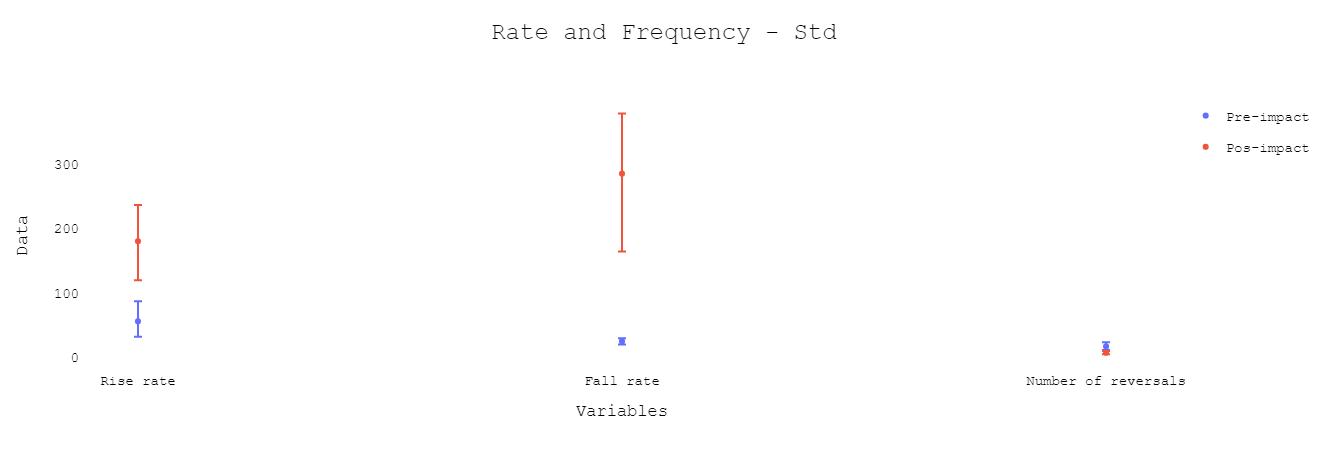

In [34]:
fig_std_RF, data_std_RF = dhram.aspects["Rate and Frequency"].plot(type="std")
py.offline.iplot(fig_std_RF)